# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

You can use patsy instead of pandas to handle the categorical variables if you like.

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [31]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [32]:
# Load the data (use delim_whitespace=True)
df = pd.read_csv('salary.dat', delim_whitespace=True)

# Take a look
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [33]:
# Apply value_counts() to series for "sx", "dg", and "rk"
print df['sx'].value_counts()
print df['dg'].value_counts()
print df['rk'].value_counts()

male      38
female    14
Name: sx, dtype: int64
doctorate    34
masters      18
Name: dg, dtype: int64
full         20
assistant    18
associate    14
Name: rk, dtype: int64


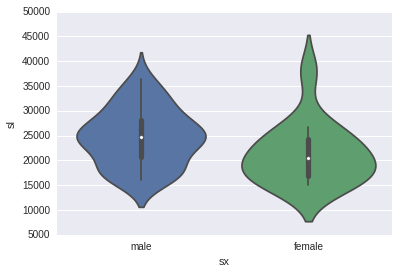

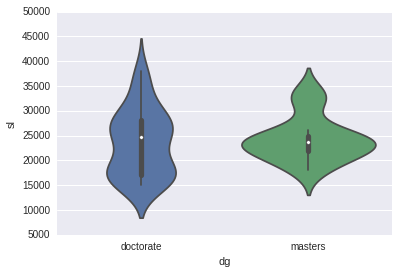

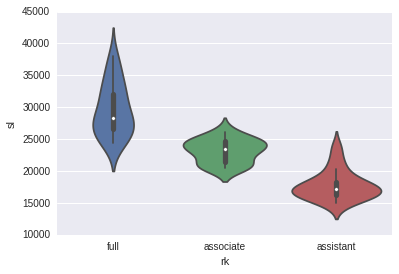

In [34]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

# Do the same for "dg" and "rk"
sns.violinplot(x='dg', y='sl', data=df)
plt.show()

sns.violinplot(x='rk', y='sl', data=df)
plt.show()

In [57]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters', u'sx_female', u'sx_male', u'rk_assistant',
       u'rk_associate', u'rk_full', u'dg_doctorate', u'dg_masters',
       u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full',
       u'dg_doctorate', u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,...,rk_full,dg_doctorate,dg_masters,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
0,male,full,25,doctorate,35,36350,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,male,full,13,doctorate,22,35350,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,male,full,10,doctorate,23,28200,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,female,full,7,doctorate,27,26775,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,male,full,19,masters,30,33696,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Here's an example to get you started.

Try reruning the next cell multiple times. You should see an improvement for some samples.

In [36]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", model.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample with regularization:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", model.score(X, y)

# Did the results improve?

Sample: 0.775700117951
All data with sample model: 0.108788201552
Sample with regularization: 0.775222193893
All data with regularization model: 0.161631338797


(38, 17)
(38,)


ValueError: x and y must be the same size

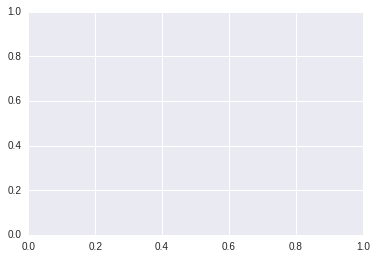

In [73]:
# Fit a model to the men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

## Fit a linear model here
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
## Plot the data
print X.shape
print y.shape


plt.scatter(X, y)



# ## and print the model score
# print 'Model Score for Male subset: ', model.score(X, y)

# # Apply the same model to the women and compare the model score
# mask = df["sx"] == "female"
# X = df[mask][[u'yr', u'yd',
#        u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
#        u'dg_masters']]
# y = df[mask][u'sl']

# print 'Model Score for Male model applied to Female: ', model.score(X, y)

In [38]:
# What about the other order? Apply to women first
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

print 'Model Score for Female subset: ', model.score(X, y)

# Apply to men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

print 'Model Score for Female model applied to Male: ', model.score(X, y)

Model Score for Female subset:  0.781837240731
Model Score for Female model applied to Male:  0.657523429275


In [39]:
# This time use regularlization (RidgeCV)

# Apply to women first
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

rlm = linear_model.Ridge(alpha=0.1, normalize=True)
ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

print 'Ridge model score for Female subset: ', ridge_model.score(X, y)

# Apply to men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

print 'Ridge model score for Female model applied to Male: ', ridge_model.score(X, y)

Ridge model score for Female subset:  0.776052416893
Ridge model score for Female model applied to Male:  0.758931781825


### Results

Did regularization improve the second fit?

Now let's move on to the next category, "dg" (degree).

In [40]:
mask = (df["dg"] == "doctorate")
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

print 'Linear model score for Doctorate subset: ', model.score(X, y)


mask = (df["dg"] != "doctorate")
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

print 'Linear model score for Doctorate model applied to non-Doctorate: ', model.score(X, y)

Linear model score for Doctorate subset:  0.876486548837
Linear model score for Doctorate model applied to non-Doctorate:  0.6849888843


In [41]:
# Reverse the order

mask = (df["dg"] != "doctorate") # !=
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

print 'Linear model score for non-Doctorate subset: ', model.score(X, y)


mask = (df["dg"] == "doctorate")
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

print 'Linear model score for non-Doctorate model applied to Doctorate: ', model.score(X, y)

Linear model score for non-Doctorate subset:  0.797682614586
Linear model score for non-Doctorate model applied to Doctorate:  0.745050571834


In [42]:
# With regularization

mask = (df["dg"] == "doctorate")
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

rlm = linear_model.Ridge(alpha=0.1, normalize=True)
ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

print 'Ridge model score for Doctorate subset: ', ridge_model.score(X, y)


mask = (df["dg"] != "doctorate")
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

print 'Ridge model score for Doctorate model applied to non-Doctorate: ', ridge_model.score(X, y)

Ridge model score for Doctorate subset:  0.872760800339
Ridge model score for Doctorate model applied to non-Doctorate:  0.525759951395


In [59]:
# With regularization
# Reverse the order

mask = (df["dg"] != "doctorate") # !=
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

rlm = linear_model.Ridge(alpha=0.1, normalize=True)
ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

print 'Ridge model score for non-Doctorate subset: ', ridge_model.score(X, y)


mask = (df["dg"] == "doctorate")
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

print 'Ridge model score for non-Doctorate model applied to Doctorate: ', ridge_model.score(X, y)

Ridge model score for non-Doctorate subset:  0.790631661643
Ridge model score for non-Doctorate model applied to Doctorate:  0.765529287714


### Results
Note by varying alpha we can shift the goodness of fit. Did regularization improve our two fits?

Next we move on to "rk" (professor rank). In this case there are three options.

In [62]:
df['rk'].value_counts()

full         20
assistant    18
associate    14
Name: rk, dtype: int64

In [70]:
mask = (df["rk"] == "full") # First subset, there are two more
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male', u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

# print X.shape
# print y.shape

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

print 'Linear model score for Full subset: ', model.score(X, y)


mask = (df["rk"] != "full")
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male', u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

print 'Linear model score for Full applied to non-Full: ', model.score(X, y)

# print X.shape
# print y.shape

Linear model score for Full subset:  0.518546885368
Linear model score for Full applied to non-Full:  -4.60483198065


In [71]:
mask = (df["rk"] == "full") # First subset, there are two more RIDGE MODEL
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male', u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

# print X.shape
# print y.shape
rlm = linear_model.Ridge(alpha=0.1, normalize=True)
ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)


print 'Ridge model score for Full subset: ', ridge_model.score(X, y)


mask = (df["rk"] != "full")
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male', u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

print 'Ridge model score for Full applied to non-Full: ', ridge_model.score(X, y)

# print X.shape
# print y.shape

Ridge model score for Full subset:  0.506996573959
Ridge model score for Full applied to non-Full:  -3.86167314062


In [52]:
# The second permutation of three

mask = (df["rk"] == "associate") # Second subset
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male', u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

print 'Linear model score for Associate subset: ', model.score(X, y)


mask = (df["rk"] != "associate")
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male', u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

print 'Linear model score for Associate applied to non-Associate: ', model.score(X, y)

Linear model score for Associate subset:  0.621136292896
Linear model score for Associate applied to non-Associate:  -0.0835279216007


In [53]:
# The third permutation of three
mask = (df["rk"] == "assistant") # Third subset
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male', u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

print 'Linear model score for Assistant subset: ', model.score(X, y)


mask = (df["rk"] != "assistant")
X = df[mask][[u'yr', u'yd', 'sx_female', 'sx_male', u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

print 'Linear model score for Assistant applied to non-Assistant: ', model.score(X, y)

Linear model score for Assistant subset:  0.515603387509
Linear model score for Assistant applied to non-Assistant:  -3.59106141162


# Results

How did the regularized models fare?

### Bonus

Try predicting "yd" by splitting the data on "sx".

In [ ]:
# Without regularization
mask = df["sx"] == "female"


In [ ]:
# With regularization, RidgeCV

In [ ]:
# With regularization, LassoCV